In [9]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'new-york-439415'
location = 'US'
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

Note: Replace the "Job ID" wherever necessery from query outputs

In [10]:
#Full and final data
#job = client.get_job('bquxjob_20b6bd62_1956311fdc9')
#print(job.query)

job = client.get_job('bquxjob_20b6bd62_1956311fdc9')
destination = job.destination
# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")

#bq_df.describe()
df_final = bq_df.to_pandas()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Reading cached table from 2025-03-04 22:53:07.323786+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Month wise data
#job = client.get_job('bquxjob_233d9a0e_19563d1ecbd')
#print(job.query)

job = client.get_job('bquxjob_233d9a0e_19563d1ecbd')
destination = job.destination
# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")

df_monthly = bq_df.to_pandas()

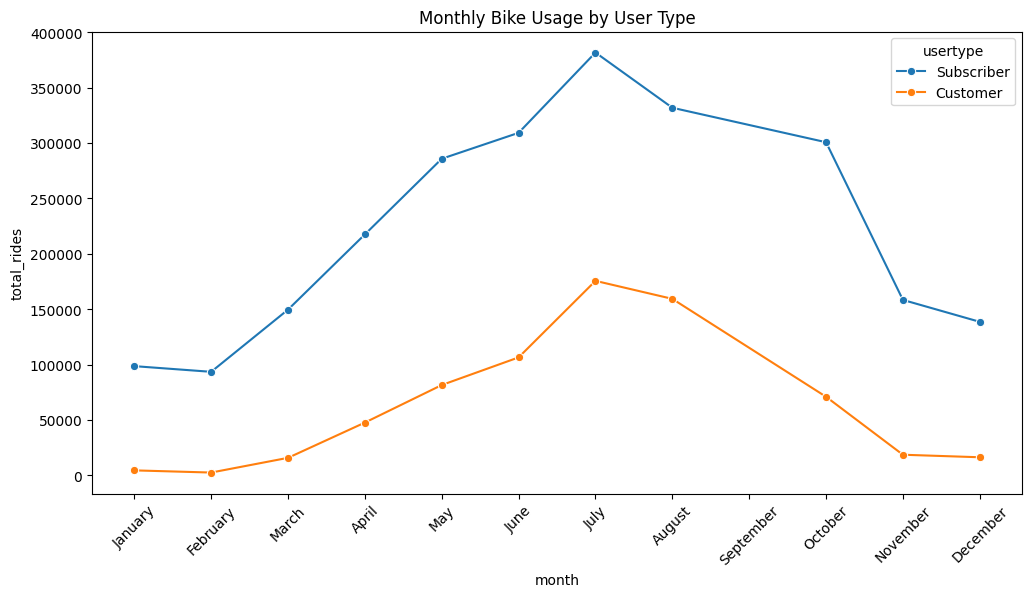

In [24]:
# Ensure month order is correct
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_monthly['month'] = pd.Categorical(df_monthly['month'], categories=month_order, ordered=True)

# Line Plot: Total Rides per Month
plt.figure(figsize=(12,6))
sns.lineplot(data=df_monthly, x="month", y="total_rides", hue="usertype", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Bike Usage by User Type")
plt.show()

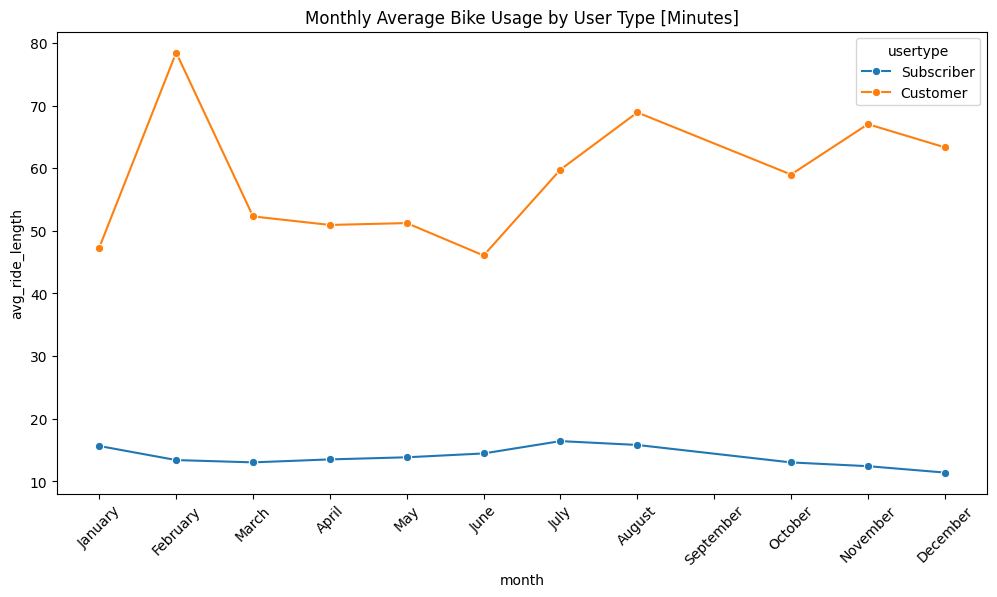

In [25]:
# Ensure month order is correct
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_monthly['month'] = pd.Categorical(df_monthly['month'], categories=month_order, ordered=True)

# Line Plot: Total Rides per Month
plt.figure(figsize=(12,6))
sns.lineplot(data=df_monthly, x="month", y="avg_ride_length", hue="usertype", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Average Bike Usage by User Type [Minutes]")
plt.show()

In [26]:
#Week wise data
#job = client.get_job('bquxjob_1059e2dd_19562cb0241')
#print(job.query)

job = client.get_job('bquxjob_1059e2dd_19562cb0241')
destination = job.destination
# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")

df_weekly = bq_df.to_pandas()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Reading cached table from 2025-03-04 20:21:09.200494+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  exec(code_obj, self.user_global_ns, self.user_ns)


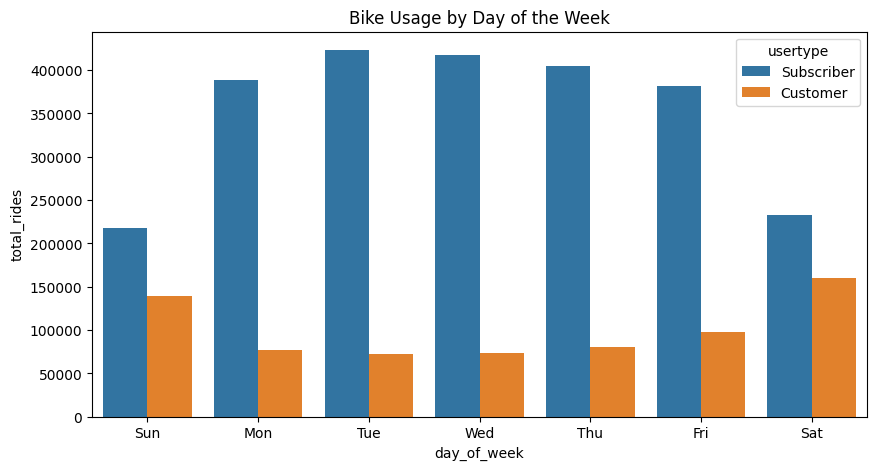

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_weekly, x="day_of_week", y="total_rides", hue="usertype")
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.title("Bike Usage by Day of the Week")
plt.show()

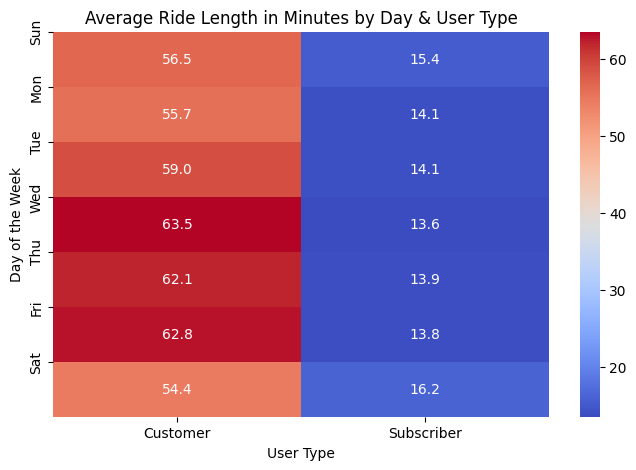

In [42]:
pivot_table = df_weekly.pivot_table(index="day_of_week", columns="usertype", values="avg_ride_length", aggfunc="mean")
pivot_table.index = pivot_table.index.astype(int)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table.values.astype(float), annot=True, cmap="coolwarm", fmt=".1f",
            xticklabels=pivot_table.columns, yticklabels=pivot_table.index)
plt.title("Average Ride Length in Minutes by Day & User Type")
plt.yticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel("User Type")
plt.ylabel("Day of the Week")
plt.show()

In [40]:
#Hour wise data
#job = client.get_job('bquxjob_3095eb2e_19562cb88a9')
#print(job.query)

job = client.get_job('bquxjob_3095eb2e_19562cb88a9')
destination = job.destination
# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")

df_hourly = bq_df.to_pandas()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Reading cached table from 2025-03-04 20:21:16.029541+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  exec(code_obj, self.user_global_ns, self.user_ns)


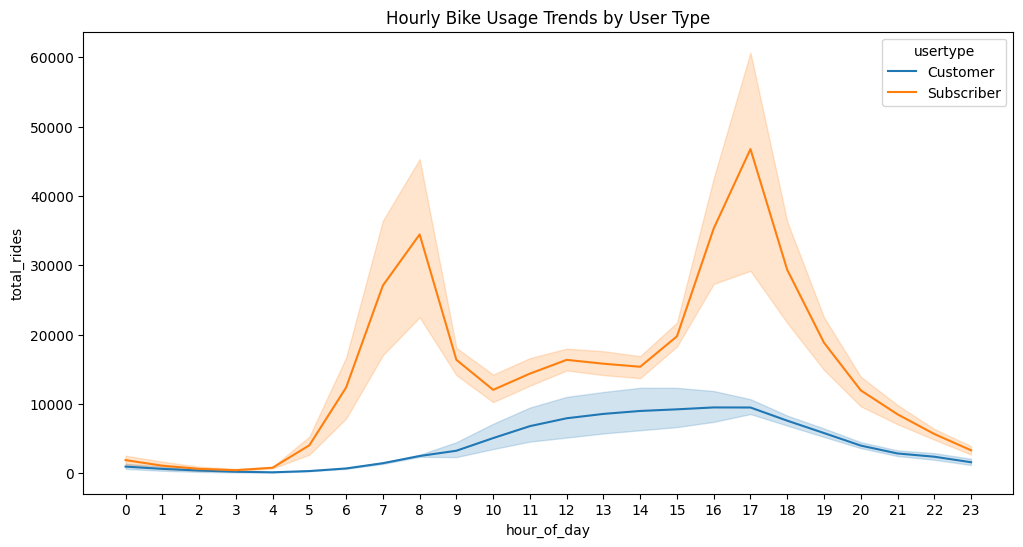

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_hourly, x="hour_of_day", y="total_rides", hue="usertype")
plt.xticks(range(0,24))
plt.title("Hourly Bike Usage Trends by User Type")
plt.show()

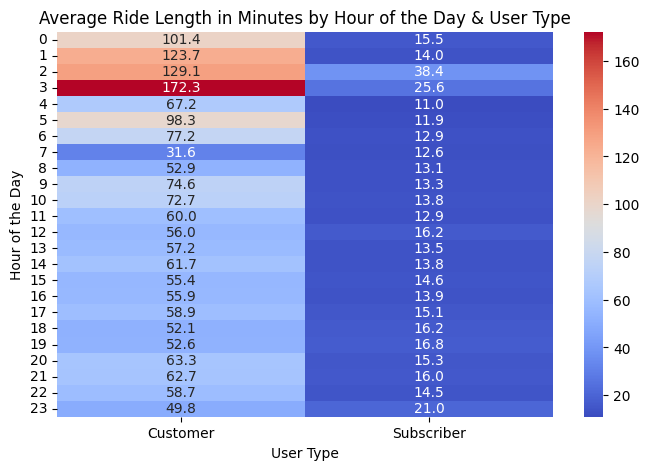

In [44]:
pivot_table = df_hourly.pivot_table(index="hour_of_day", columns="usertype", values="avg_ride_length", aggfunc="mean")
pivot_table.index = pivot_table.index.astype(int)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table.values.astype(float), annot=True, cmap="coolwarm", fmt=".1f",
            xticklabels=pivot_table.columns, yticklabels=pivot_table.index)
plt.title("Average Ride Length in Minutes by Hour of the Day & User Type")
#plt.yticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel("User Type")
plt.ylabel("Hour of the Day")
plt.show()

In [45]:
#Gender data
#job = client.get_job('bquxjob_27f1a4f6_195633b872a')
#print(job.query)

job = client.get_job('bquxjob_27f1a4f6_195633b872a')
destination = job.destination
# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")

df_gender = bq_df.to_pandas()

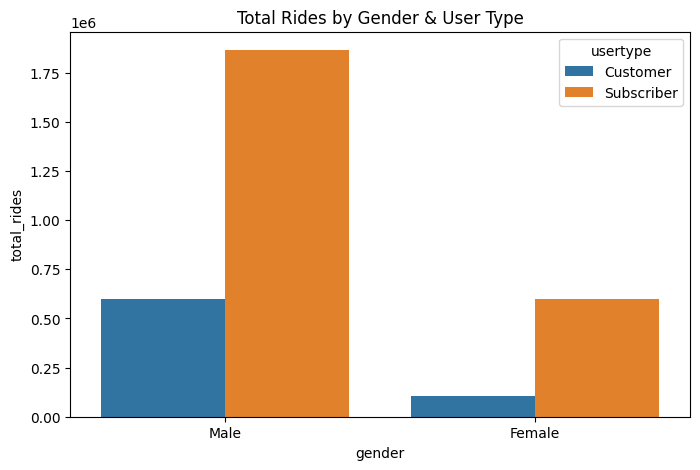

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_gender, x="gender", y="total_rides", hue="usertype")
plt.title("Total Rides by Gender & User Type")
plt.show()

In [47]:
#Age Group data
#job = client.get_job('bquxjob_1e553b7d_1956341d7b7')
#print(job.query)

job = client.get_job('bquxjob_1e553b7d_1956341d7b7')
destination = job.destination
# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")

df_age = bq_df.to_pandas()

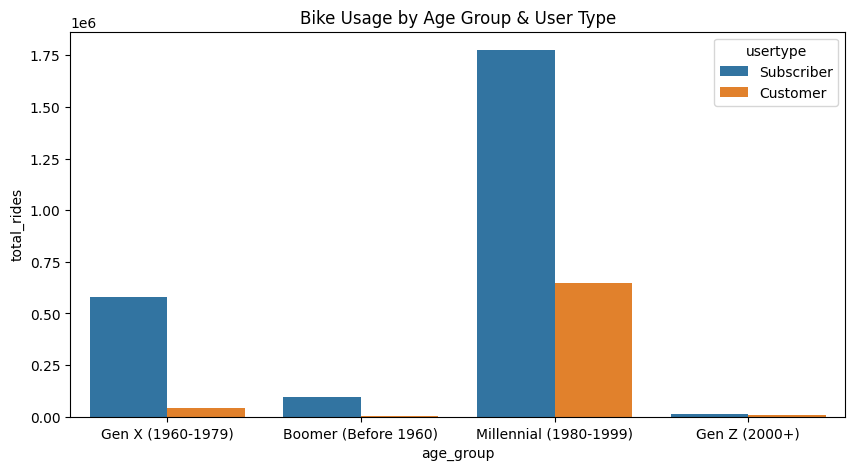

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_age, x="age_group", y="total_rides", hue="usertype")
plt.title("Bike Usage by Age Group & User Type")
plt.show()

In [49]:
#Gender-Age data
#job = client.get_job('bquxjob_4c72dc6d_195634370fe')
#print(job.query)

job = client.get_job('bquxjob_4c72dc6d_195634370fe')
destination = job.destination
# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")

df_age_gender = bq_df.to_pandas()

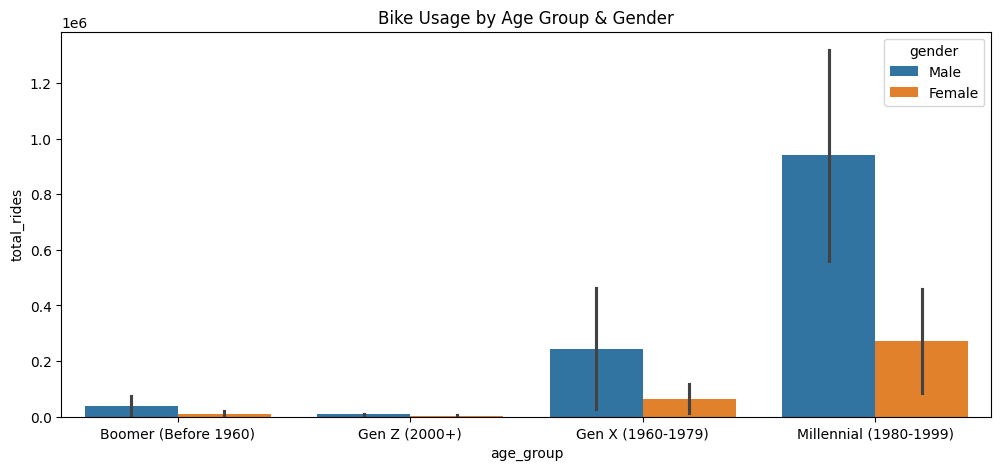

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_age_gender, x="age_group", y="total_rides", hue="gender")
plt.title("Bike Usage by Age Group & Gender")

plt.show()

In [30]:
#Additonals
#To check for outliers
#birthyear_count = df_final['birthyear'].value_counts().sort_index()
#plt.figure(figsize=(12,6))
#sns.barplot(x=birthyear_count.index, y=birthyear_count.values, color='blue')
#plt.xticks(rotation=90)
#plt.show()